<a href="https://colab.research.google.com/github/raman-iisermohali/Repository/blob/main/Construct_Closed_Subtheory_of_Paulis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The code does the following:
# 1. Take as input a set of Paulis, say S, Constructs the CLOSED SUBTHEORY S'.
# 2. Construct the Compatibility graph of S'.
# 3. Check Chordality of S'.


# Note that our premise here is that we are given a Hamiltonian as a weighted sum of Paulis with real weights SO ANY '-' SIGN IN FRONT OF PAULIS IN S is assumed to be absorbed in the coefficients so that below we can mention the S(the starting set) with no signs
### Although this Code works perfectly well as long as the Paulis supplied are signed with (+-)1 ones but not with (+-) Iota. 

In [ ]:
# Since we only compute products of Commuting Signed Paulis where the two Commuting Signed PAULIS are Hermitian i.e. each only +-1 signed 
# this is because we start with a set of Hermitian(Signed +-1) Paulis only and then take the product of two which commute.
# if you change the starting set to any signed pauli from the Pauli group then this code won't work always.

In [ ]:
import networkx as nx
from networkx import isomorphism as ism
import numpy as np
import sys

In [ ]:
# Create a function that checks Commutativity of two Pauli Strings: Count the number of qubits where the string doesn't commute and if even the strings commute otherwise don't.
def Commute(x,y):
  # here x and y will be Pauli strings of size n
  z=0 # tracks the number of corresponding(qubit-wise) anticommuting terms 
  if x[0]=='-':
    p=''
    for i in range(1,len(x)):
      p=p+x[i]
    x=p
  if y[0]=='-':
    p=''
    for i in range(1,len(y)):
      p=p+y[i]
    y=p
  for i in range(0,len(x)):
    if x[i]==y[i] or x[i]=='I' or y[i]=='I':
      continue
    else: 
      z=z+1
  if z%2==0:
    return True
  else:
    return False      


In [ ]:
# Create a function that takes in two Pauli strings gives their products
def Product(x,y):
  # we require variables that store the signs of iota and of - in the observables. The iota comes in single qubit products where we have both operators non-identity.
  # like XY=iZ, YX=-iZ, YZ=iX, ZY=-iX, ZX=iY, XZ=-iY.
  o=0 # counts the + iota terms
  p=0 # counts the - iota terms
  k=0 # counts the -1 terms
  if x[0]=='-':
    k=k+1
    q=''
    for i in range(1,len(x)):
      q=q+x[i]
    x=q
  if y[0]=='-':
    k=k+1
    q=''
    for i in range(1,len(y)):
      q=q+y[i]
    y=q
  z=''
  for i in range(0,len(x)):
    if x[i]==y[i]:
      z=z+'I'
    elif x[i]=='I':
      z=z+y[i]
    elif y[i]=='I':
      z=z+x[i]
    elif x[i]+y[i]=='XY':
      z=z+'Z'
      o=0+1
    elif x[i]+y[i]=='YX': 
      z=z+'Z' 
      p=p+1
    elif x[i]+y[i]=='XZ':  
      z=z+'Y' 
      p=p+1
    elif x[i]+y[i]=='ZX':
      z=z+'Y'
      o=o+1
    elif x[i]+y[i]=='YZ':
      z=z+'X'
      o=o+1
    elif x[i]+y[i]=='ZY':
      z=z+'X'
      p=p+1
  Iota=complex(0,1)
  I=((-1)**(p))*(Iota)**(o+p)     
  if (I==+1 and k%2==0) or (I==-1 and k%2!=0):
    return z
  else:
    return '-'+ z  


In [ ]:
# Take as input the set S 
S=['IX','ZI','XI','IZ'] # GIVES PERES-MERMIN SQUARE
#S=['ZI','IZ','XX','YY'] #DUMITRESCU ET. AL.
#S=['ZII','IZI','XXI','YYI','IIZ','IXX','IYY']#DUMITRESCU ET. AL.
#S=['ZI','IZ','ZZ','YY','XX'] # O'MALLEY ET.AL.
#S=['ZIII','IZII','IIZI','IIIZ','ZZII','ZIZI','IZZI','ZIIZ','IZIZ','IIZZ','XXYY','XYYX','YYXX','YXXY'] # HempeL et.al.-JW-  NC
#S=['XX','YY','ZZ','ZI'] KANDALA ET.AL.
#S=['ZII','IZI','IIZ','ZZI','ZIZ','IZZ','XXI','YYI','XIX','YIY','IXX','IYY'] #HEMPALL ET.AL.-LIH2
#S=['ZIII','ZZII','IZII','IIZI','IIZZ','IIIZ','ZIZI','ZIZZ','ZIIZ','ZZZI','ZZZZ','ZZIZ','IZZI','IZZZ','IZIZ','XZII','XIII','IIXZ','IIXI','XZXZ','XZXI','XIXZ','XIXI','XZIZ','XIIZ','IZXZ','IZXI','XXII','IXII','IIXX','IIIX','XIXX','XIIX','XXXI','XXXX','XXIX','IXXI','IXXX','IXIX','YYII','IIYY','YYYY','ZXII','IIZX','ZIZX','ZIIX','ZXZI','IXZI','ZXZX','ZXIX','IXZX','ZIXZ','ZIXI','ZZXZ','ZZXI','ZIXX','ZZXX','ZZIX','IZXX','IZIX','ZIYY','ZZYY','IZYY','XZZI','XIZI','XZZZ','XIZZ','XZXX','XZIX','XZYY','XIYY','XZZX','XIZX','IZZX','XXZI','XXZZ','XXIZ','IXZZ','IXIZ','YYZI','YYZZ','YYIZ','XXXZ','IXXZ','YYXZ','YYXI','XXYY','IXYY','YYXX','YYIX','XXZX','YYZX','ZZZX','ZXXZ','ZXXI','ZXIZ','ZXXX','ZXYY','ZXZZ']# Kandala et. al. LiH
#S=['ZIIIII','ZZIIII','IZZIII','IIZIII','IIIZII','IIIZZI','IIIIZZ','IIIIIZ','IZIIII','ZZZIII','ZIZIII','ZIIZII','ZIIZZI','ZIIIZZ','ZIIIIZ','ZZIZII','ZZIZZI','ZZIIZZ','ZZIIIZ','IZZZII','IZZZZI','IZZIZZ','IZZIIZ','IIZZII','IIZZZI','IIZIZZ','IIZIIZ','IIIIZI','IIIZZZ','IIIZIZ','XZIIII','XZIIZX','XIIIII','XZIIIX','IZXIII','XIIIZX','IIXIII','XIIIIX','IIIXZI','IZXXZI','IIIXII','IZXXII','IIIIZX','IIXXZI','IIIIIX','IIXXII','XIXIII','IZXIZX','XZXIII','IZXIIX','XZIXZI','IIXIZX','XZIXII','IIXIIX','XIIXZI','IIIXIX','XIIXII','IIIXZX','ZZXIII','ZIXIII','ZIIXZI','ZIIXII','ZIIIZX','ZIIIIX','ZZIXZI','ZZIXII','ZZIIZX','ZZIIIX','XIZIII','XZZIII','XZIZII','XIIZII','XZIZZI','XIIZZI','XZIIZZ','XIIIZZ','XZIIIZ','XIIIIZ','YIYIII','YYIXXZ','YYIIXI','IYYXXZ','IYYIXI','IIIXIZ','XXZXXZ','XXZIXI','IXIXXZ','IXIIXI','IIZXII','XXZYYI','XXZIYY','IXIYYI','IXIIYY','IIIYIY','YYIYYI','YYIIYY','IYYYYI','IYYIYY','XXXXXZ','XXXIXI','IIXIIZ','YXYZXZ','XXZXXX','IXIXXX','IIZIIX','XXXYYI','XXXIYY','XXXZXX','XXZYXY','IXIYXY','YXYXXZ','YXYIXI','YXYZXX','YYIXXX','IYYXXX','YXYYYI','YXYIYY','ZXZXXZ','ZXZIXI','YYIYXY','IYYYXY','XXXXXX','ZXZYYI','ZXZIYY','XXZZXZ','IXIZXZ','XXXYXY','ZXZXXX','YYIZXZ','IYYZXZ','YXYXXX','ZXZYXY','XXZZXX','IXIZXX','IIIZIX','YXYYXY','ZXZZXZ','YYIZXX','IYYZXX','XXXZXZ','IIXZII','ZXZZXX','ZXXXXZ','ZXXIXI','IIIXZZ','ZXXYYI','ZXXIYY','ZXXXXX','ZXXYXY','ZXXZXZ','ZXXZXX','IZZXZI','IZZXII','IZZIZX','IZZIIX','IIZXZI','IIZIZX','IZXZII','IZXZZI','IIXZZI','IZXIZZ','IIXIZZ','IZXIIZ','IIIZZX']# Kandala et. al. BeH2

In [ ]:
#CONSTRUCT THE COMPATIBILITY GRAPH OF S
G=[]
for i in range(0,len(S)):
  for j in range(0,len(S)):
    if Commute(S[i],S[j]) and S[i]!=S[j]:
      G.append((S[i],S[j]))
G=nx.Graph(G)
G.edges()

EdgeView([('IX', 'ZI'), ('IX', 'XI'), ('ZI', 'IZ'), ('XI', 'IZ')])

TESTING CONTEXTUALITY


S is Contextual
Condition 3 matches:
{'IX': 1, 'XI': 2, 'IZ': 3, 'ZI': 4}


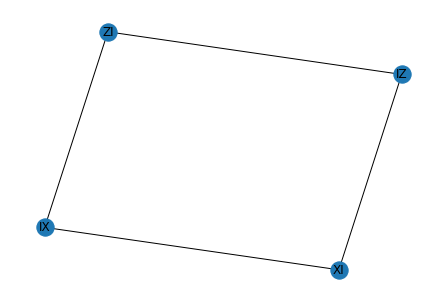

In [ ]:
# Creating Condition 1
G1=[(1,2),(2,3)]
G1=nx.Graph(G1)
G1.add_node(4)
GM1=ism.GraphMatcher(G,G1)
# Creating Condition 2
G2=[(1,2),(2,3),(3,4)]
G2=nx.Graph(G2)
GM2=ism.GraphMatcher(G,G2)
# Creating Condition 3
G3=[(1,2),(2,3),(3,4),(1,4)]
G3=nx.Graph(G3)
GM3=ism.GraphMatcher(G,G3)
if GM1.subgraph_is_isomorphic() or GM2.subgraph_is_isomorphic() or GM3.subgraph_is_isomorphic():
  print("S is Contextual")
  if GM1.subgraph_is_isomorphic():
    print('Condition 1 matches:')
    print(GM1.mapping)
    a=[k for k in GM1.mapping]
    E=[]
    for i in a:
      for j in a:
        if i!=j and (i,j) in G.edges() and (j,i) not in E:
          E.append((i,j))
    Q=nx.Graph(E)      
    nx.draw(Q,with_labels=True)
  if GM2.subgraph_is_isomorphic():
    print('Condition 2 matches:')
    print(GM2.mapping)
    a=[k for k in GM2.mapping]
    E=[]
    for i in a:
      for j in a:
        if i!=j and (i,j) in G.edges() and (j,i) not in E:
          E.append((i,j))
    Q=nx.Graph(E)      
    nx.draw(Q,with_labels=True)
  if GM3.subgraph_is_isomorphic():
    print('Condition 3 matches:')
    print(GM3.mapping)
    a=[k for k in GM3.mapping]
    E=[]
    for i in a:
      for j in a:
        if i!=j and (i,j) in G.edges() and (j,i) not in E:
          E.append((i,j))
    Q=nx.Graph(E)      
    nx.draw(Q,with_labels=True)
else:
  print("S is Non-Contextual") 

In [ ]:
# The following function gives S', the closed subtheory for S.
def Construct(S):
  a=0 # denotes length of part of Constructed subtheory by say iteration 't' here initialized arbitrarily
  b=1 # denotes length of part of Constructed subtheory after adding few more operators from 1 step previously constructed subpart of subtheory
  E=[] # will store the edges for compatibility graph
  while (b-a)!=0:
    A=[]
    for i in range(a,len(S)):
      for j in range(0,len(S)):  
        if Commute(S[i],S[j]):
          if i!=j and (S[i],S[j]) not in E:
            E.append((S[i],S[j]))
          P = Product(S[i],S[j])
          if P not in S and P not in A:
            A.append(P) 
    a = len(S)
    if len(A)!=0:
      for i in range(0,len(A)):
        x = A[i]
        S.append(x)
    b = len(S)    
  return S,E 
  

CREATE SUBTHEORY OF S


In [ ]:
S1=Construct(S)

In [ ]:
print(S1[0])
print(len(S1[0]))

['IX', 'ZI', 'XI', 'IZ', 'II', 'ZX', 'XX', 'ZZ', 'XZ', 'YY', '-YY', '-ZZ', '-XX', '-II', '-XZ', '-ZX', '-IZ', '-ZI', '-XI', '-IX']
20


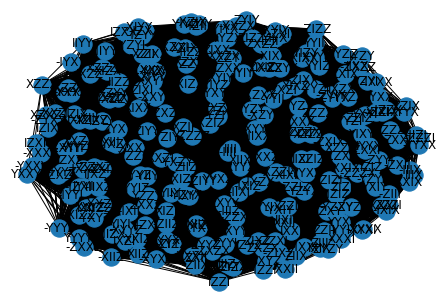

In [ ]:
Graph=nx.Graph(S1[1])
nx.draw(Graph,with_labels=True)

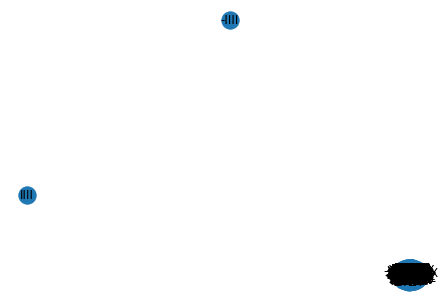

In [ ]:
m=nx.complement(Graph)
nx.draw(m,with_labels=True)

In [ ]:
nx.is_chordal(Graph)

False

GET THE NON-CHORDAL CYCLES (IF ANY)


In [ ]:
# simple_cycles finder works only for directed graphs so in the first step here we convert S's Compatibility graph to directed one by putting double edges
G=Graph.to_directed()
#nx.draw(G,with_labels=True)
for c in nx.simple_cycles(G):
  if len(c)>=4:
    print(c) 
    break
#a=list(nx.simple_cycles(G))
#b=[] # list that contains all chordless cycles (Simple cycles) 
#for i in a:
 ##  b.append(i)  
  #else:
  #  print("G is Chordal")  
#if len(b)!=0:
 # print("G is Non-Chordal")  
 # print(b)    

['YIYX', '-IZII', '-XZZX', '-IZIX', '-ZIII', '-ZXXZ', '-ZIXI', '-IZXI', '-XZXZ', '-ZIIX', 'YZYZ', '-XIIX', 'ZYZY', '-XIXI', 'IYIY', '-IXIX', 'YIYI', '-IXII', '-XIII', 'IYZY', '-IXXI', 'YZYI', '-XIXZ', '-IZXZ', 'ZYIY', '-XIIZ', '-IXZZ', '-ZIIZ', '-ZXZZ', '-IXIZ', '-ZIXZ', 'YIYZ', '-IZIZ', '-XIZZ', '-IZZI', '-IXXZ', '-XZZZ', '-XIZI', '-XIZX', '-ZIZZ', '-ZIZI', '-IZZX', '-ZZZX', '-ZIZX', '-ZZIX', '-XZIZ', '-IXZX', '-IZZZ', '-IIIZ', '-IXZI', '-IIZZ', '-IIZI', '-IIZX', '-ZZXZ', '-IIXI', '-XZXI', '-ZZZZ', '-ZXIX', '-IIIX', '-ZZXI', '-IIXZ', '-ZZIZ', '-XZIX', '-ZXZI', 'ZYYI', '-XZII', '-XZZI', 'IYYI', '-IIII', '-ZZZI', '-ZXXI', '-ZXIZ', 'YIZY', 'ZXZZ', '-ZXII', 'YZZY', 'ZYYZ', 'ZXYY', 'IYYZ', 'ZXXI', 'YZIY', 'YIIY', 'ZXXX', 'YXIY', '-ZZII', 'ZZZX', 'YXYZ', 'YXZY', '-ZXZX', 'ZXXZ', '-XYZY', '-XYIY', 'YYZX', 'YXYI', 'XXZX', '-XYYI', '-XYYZ', 'ZXIZ', 'IYYX', 'YYIX', '-ZYXY', '-IYXY', 'IXYY', 'ZYYX', 'YYXX', '-ZYIY', 'XXYY', '-IYZY', 'YYXZ', '-IYYX', '-ZYZY', '-IYIY', 'YYXI', 'IYXY', 'IXXZ', '-IY

In [ ]:
c=[(1,2),(2,3),(3,4),(4,1),(4,5)]
D=nx.Graph(c)
D=D.to_directed()
a=list(nx.recursive_simple_cycles(D))
print(a)

[[1, 2], [1, 2, 3, 4], [1, 4, 3, 2], [1, 4], [2, 3], [3, 4], [4, 5]]


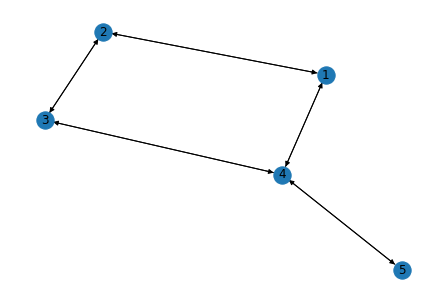

In [ ]:
nx.draw(D,with_labels=True)